In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import tensorflow as tf

In [55]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
#Import the fashion images dataset
data = tf.keras.datasets.fashion_mnist

In [35]:
(X_train, y_train), (X_test, y_test) = data.load_data()

# Data Exploration

In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


60,000 training images and 10,000 test images

In [37]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

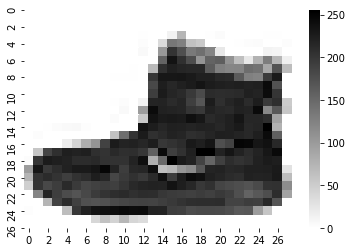

In [38]:
#Visually see the image
sns.heatmap(X_train[0], cmap=plt.cm.binary)
plt.show()

# Data Preprocessing

In [39]:
#Normalize the images for faster training and to have it in a small range
X_train, X_test = X_train/255, X_test/255

In [40]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

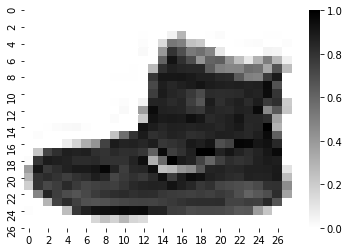

In [41]:
#Visually see the normalized image
sns.heatmap(X_train[0], cmap=plt.cm.binary)
plt.show()

In [42]:
#Make data 3D because CNN expects color dimension as well
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Make Model

In [51]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 15, validation_split=0.15, callbacks=[EarlyStopping(monitor='val_loss')])

Train on 51000 samples, validate on 9000 samples
Epoch 1/15
51000/51000 [==============================] - 28s 556us/sample - loss: 0.4756 - accuracy: 0.8245 - val_loss: 0.3405 - val_accuracy: 0.8694
Epoch 2/15
51000/51000 [==============================] - 28s 556us/sample - loss: 0.3019 - accuracy: 0.8887 - val_loss: 0.3086 - val_accuracy: 0.8850
Epoch 3/15
51000/51000 [==============================] - 30s 589us/sample - loss: 0.2565 - accuracy: 0.9061 - val_loss: 0.3016 - val_accuracy: 0.8911
Epoch 4/15
51000/51000 [==============================] - 32s 622us/sample - loss: 0.2277 - accuracy: 0.9161 - val_loss: 0.2556 - val_accuracy: 0.9066
Epoch 5/15
51000/51000 [==============================] - 31s 610us/sample - loss: 0.2013 - accuracy: 0.9252 - val_loss: 0.2393 - val_accuracy: 0.9144
Epoch 6/15
51000/51000 [==============================] - 32s 622us/sample - loss: 0.1780 - accuracy: 0.9334 - val_loss: 0.2601 - val_accuracy: 0.9062


# Model Evaluation/Testing

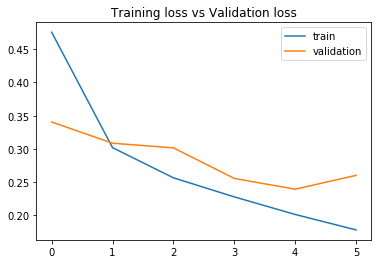

In [57]:
plt.title("Training loss vs Validation loss")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

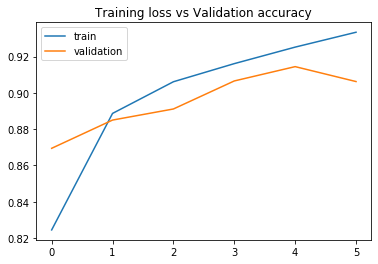

In [59]:
plt.title("Training loss vs Validation accuracy")
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [62]:
pred = model.evaluate(X_test, y_test)
print("Test loss: " + str(pred[0]) + "\nTest accuracy: " + str(pred[1]))

10000/10000 [==============================] - 1s 121us/sample - loss: 0.2701 - accuracy: 0.9026
Test loss: 0.27013382957577703
Test accuracy: 0.9026
